## Import Python Packages and Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from lifelines import *
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

## Importing and Analyzing the Dataset

In [3]:
df = pd.read_csv("datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Visualization

Text(0.5, 1.0, 'Gender Distribution Among the Customers')

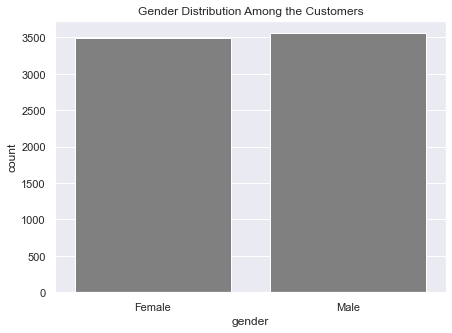

In [5]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(7,5)})

sns.countplot(x="gender", 
              data = df, 
              color = 'gray'
             ).set_title('Gender Distribution Among the Customers')

Text(0.5, 1.0, 'Distribution of Senior Citizens grouped by Partners')

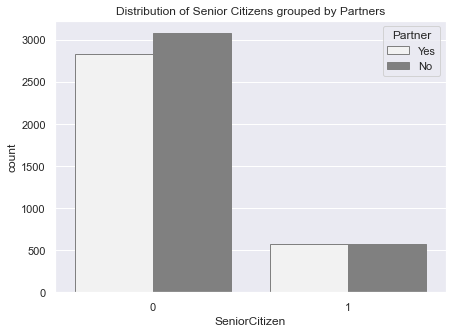

In [6]:
sns.countplot(x = 'SeniorCitizen', hue = 'Partner', 
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Distribution of Senior Citizens grouped by Partners')

Text(0.5, 1.0, 'Customers with Dependents')

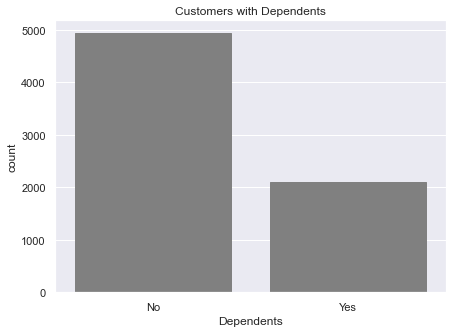

In [7]:
sns.countplot(x = 'Dependents',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Customers with Dependents')

Text(0.5, 1.0, 'Dependents and Partner Distribution among the Customers')

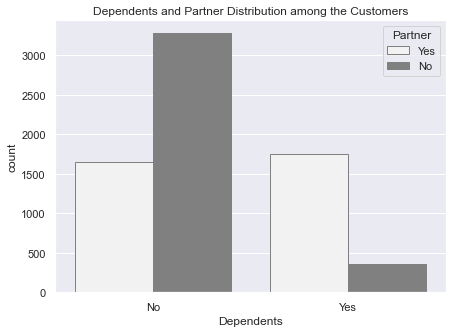

In [8]:
sns.countplot(x = 'Dependents', hue = 'Partner', 
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Dependents and Partner Distribution among the Customers')

Text(0.5, 1.0, 'Dependents and Senior Citizen Distribution')

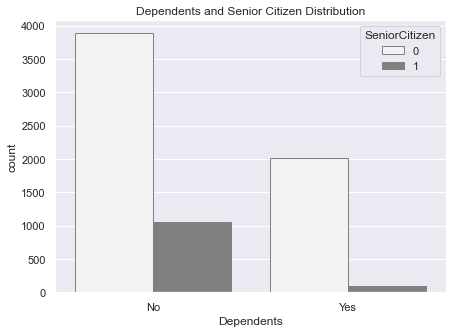

In [9]:
sns.countplot(x = 'Dependents', hue = 'SeniorCitizen', 
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Dependents and Senior Citizen Distribution')

Text(0.5, 1.0, 'Customers with Phone Service')

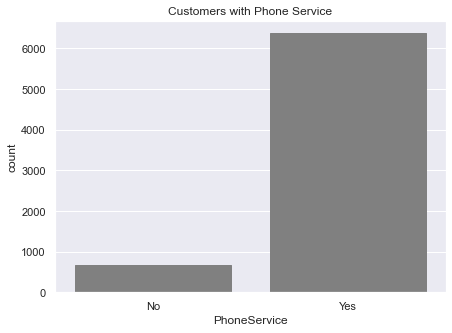

In [10]:
sns.countplot(x = 'PhoneService', 
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Customers with Phone Service')

Text(0.5, 1.0, 'Gender Distribution Among the Three Classes of Population')

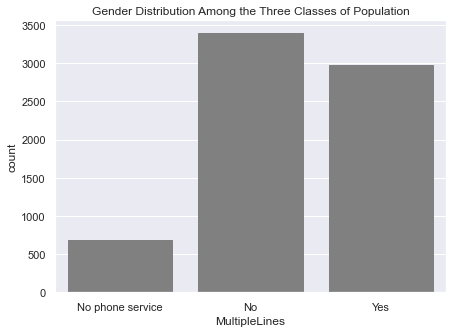

In [11]:
sns.countplot(x = 'MultipleLines',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Gender Distribution Among the Three Classes of Population')

Text(0.5, 1.0, 'Phone Service and Multiple Lines')

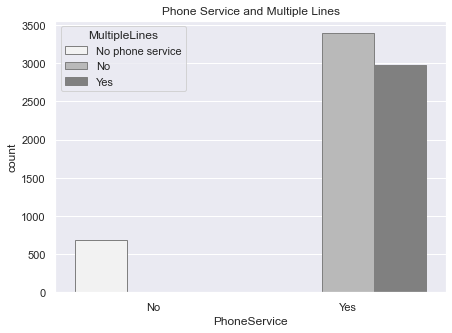

In [12]:
sns.countplot(x = 'PhoneService', hue = 'MultipleLines',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Phone Service and Multiple Lines')

Text(0.5, 1.0, 'Internet Service')

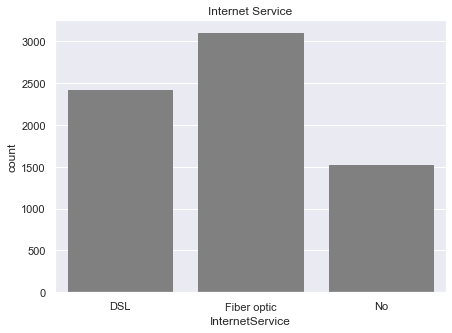

In [13]:
sns.countplot(x = 'InternetService', 
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service')

Text(0.5, 1.0, 'Online Security')

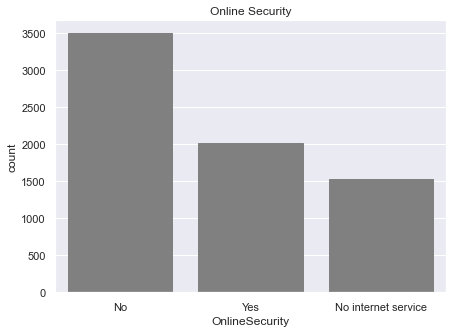

In [14]:
sns.countplot(x = 'OnlineSecurity', 
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Online Security')

Text(0.5, 1.0, 'Internet Service and Online Security')

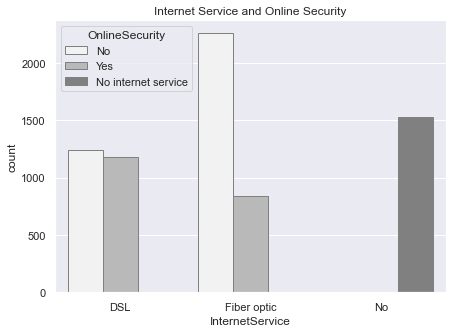

In [15]:
sns.countplot(x = 'InternetService', hue = 'OnlineSecurity',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Online Security')

Text(0.5, 1.0, 'Internet Service and Online Backup')

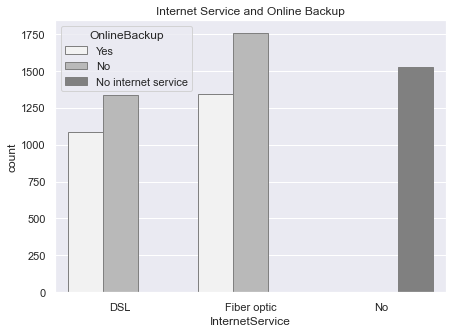

In [16]:
sns.countplot(x = 'InternetService', hue = 'OnlineBackup',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Online Backup')

Text(0.5, 1.0, 'Internet Service and Device Protection')

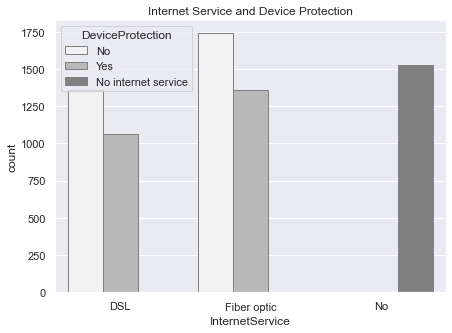

In [17]:
sns.countplot(x = 'InternetService', hue = 'DeviceProtection',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Device Protection')

Text(0.5, 1.0, 'Internet Service and Tech Support')

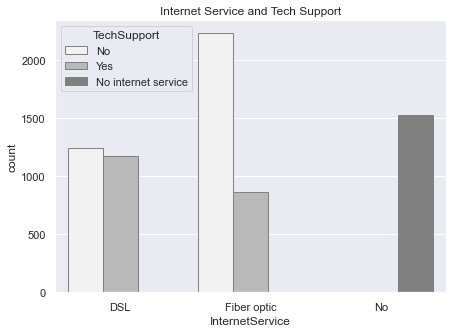

In [18]:
sns.countplot(x = 'InternetService', hue = 'TechSupport',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Tech Support')

Text(0.5, 1.0, 'Internet Service and Streaming TV')

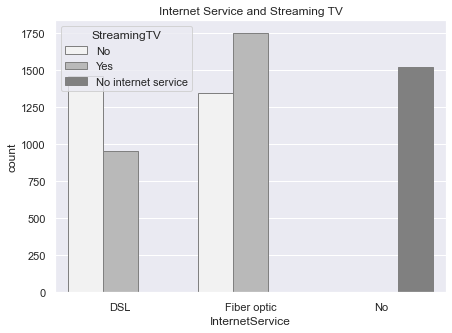

In [19]:
sns.countplot(x = 'InternetService', hue = 'StreamingTV',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Streaming TV')

Text(0.5, 1.0, 'Internet Service and Streaming Movies')

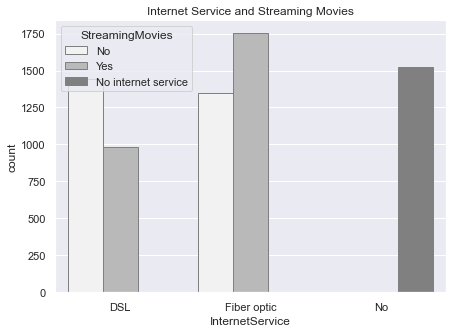

In [20]:
sns.countplot(x = 'InternetService', hue = 'StreamingMovies',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Streaming Movies')

Text(0.5, 1.0, 'Types of Contracts among the Customers')

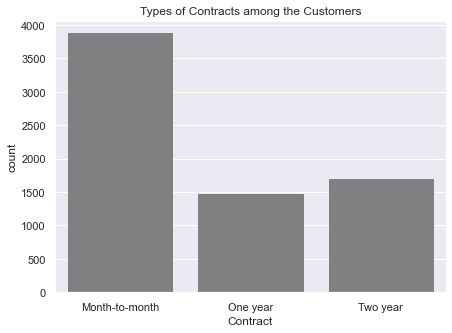

In [21]:
sns.countplot(x = 'Contract',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Types of Contracts among the Customers')

Text(0.5, 1.0, 'Contract Type and Paperless Billing')

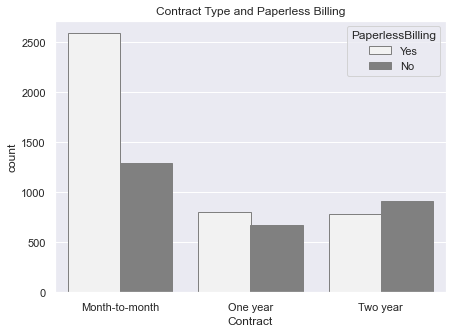

In [22]:
sns.countplot(x = 'Contract', hue = 'PaperlessBilling',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Contract Type and Paperless Billing')

Text(0.5, 1.0, 'Contract Type and Payment Method')

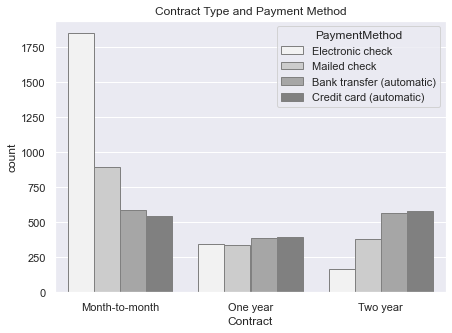

In [23]:
sns.countplot(x = 'Contract', hue = 'PaymentMethod',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Contract Type and Payment Method')

Text(0.5, 1.0, 'Churning Customers grouped by Gender')

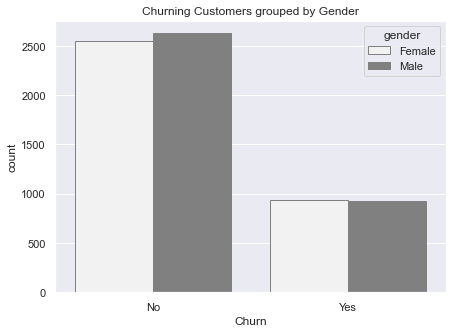

In [24]:
sns.countplot(x = 'Churn', hue = 'gender',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Gender')

Text(0.5, 1.0, 'Churning Customers grouped by Senior or Normal Citizens')

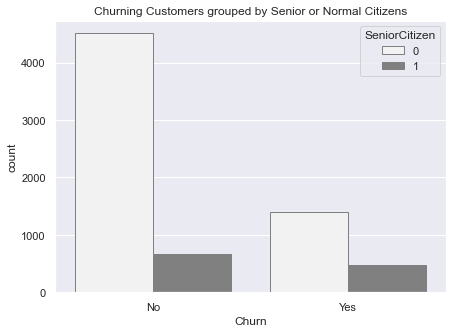

In [25]:
sns.countplot(x = 'Churn', hue = 'SeniorCitizen',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Senior or Normal Citizens')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Partners')

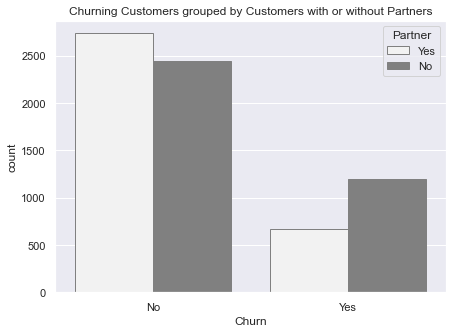

In [26]:
sns.countplot(x = 'Churn', hue = 'Partner',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Partners')

Text(0.5, 1.0, 'Churning Customers grouped by Dependents or No Dependents')

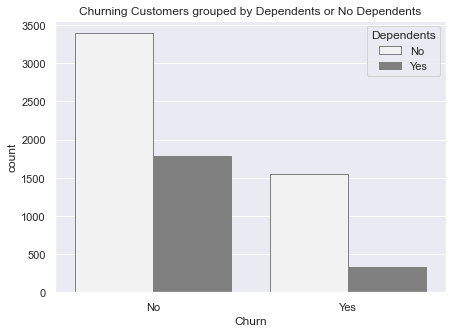

In [27]:
sns.countplot(x = 'Churn', hue = 'Dependents',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Dependents or No Dependents')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Phone Service')

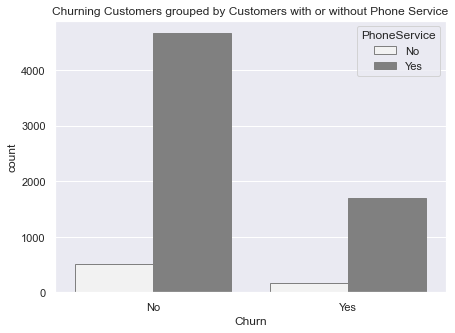

In [28]:
sns.countplot(x = 'Churn', hue = 'PhoneService',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Phone Service')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Multiple Phone Lines')

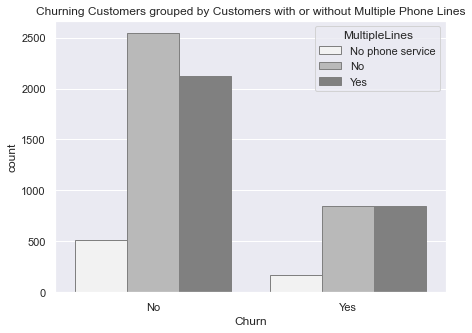

In [29]:
sns.countplot(x = 'Churn', hue = 'MultipleLines',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Multiple Phone Lines')

Text(0.5, 1.0, 'Churning Customers grouped by type of Internet Service')

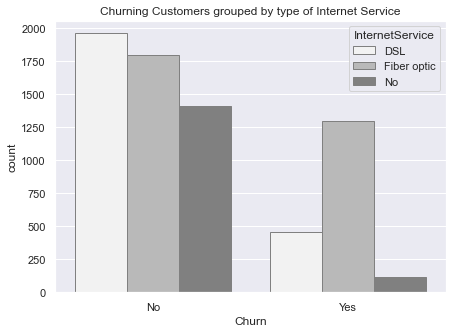

In [30]:
sns.countplot(x = 'Churn', hue = 'InternetService',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by type of Internet Service')

Text(0.5, 1.0, 'Churning Customers grouped by the type of Online Security')

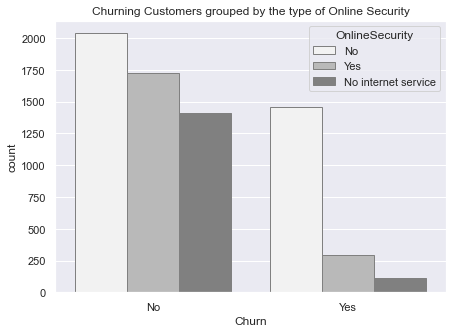

In [31]:
sns.countplot(x = 'Churn', hue = 'OnlineSecurity',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by the type of Online Security')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Online Backup')

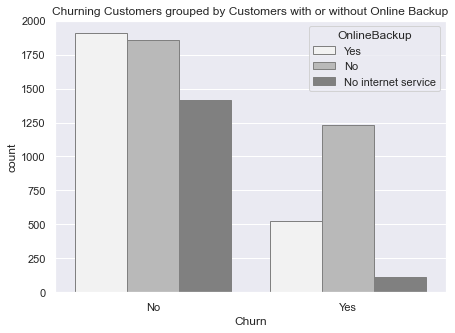

In [32]:
sns.countplot(x = 'Churn', hue = 'OnlineBackup',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Online Backup')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Device Protection')

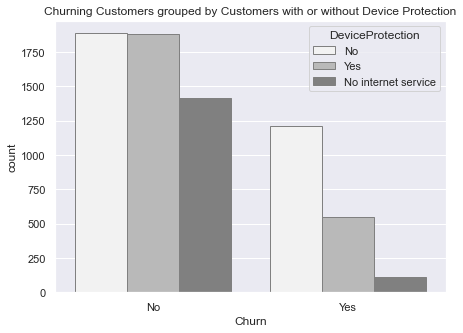

In [33]:
sns.countplot(x = 'Churn', hue = 'DeviceProtection',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Device Protection')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Tech Support')

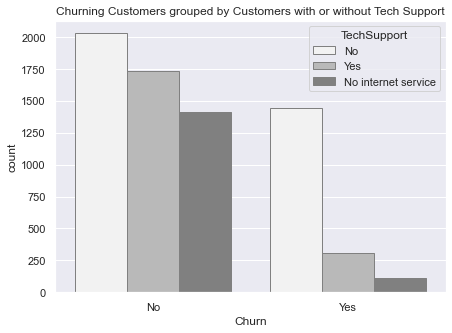

In [34]:
sns.countplot(x = 'Churn', hue = 'TechSupport',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Tech Support')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Streaming TV')

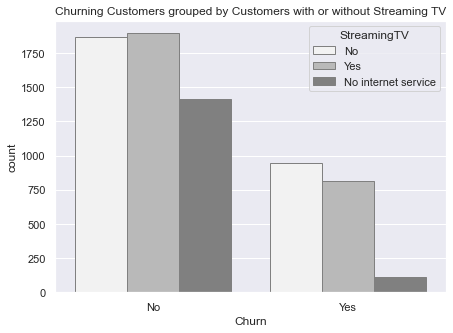

In [35]:
sns.countplot(x = 'Churn', hue = 'StreamingTV',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Streaming TV')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Streaming Movies')

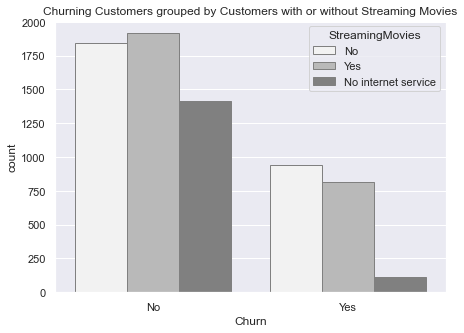

In [36]:
sns.countplot(x = 'Churn', hue = 'StreamingMovies',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Streaming Movies')

Text(0.5, 1.0, 'Churning Customers grouped by the Contract Type')

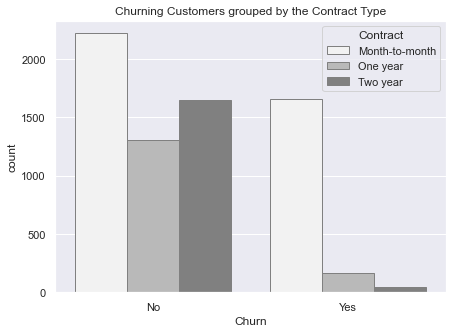

In [37]:
sns.countplot(x = 'Churn', hue = 'Contract',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by the Contract Type')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Paperless Billing')

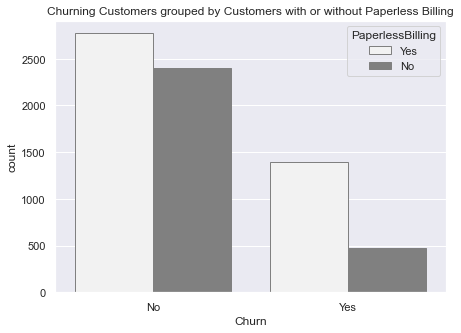

In [38]:
sns.countplot(x = 'Churn', hue = 'PaperlessBilling',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Paperless Billing')

Text(0.5, 1.0, 'Churning Customers grouped by the type of Payment Method')

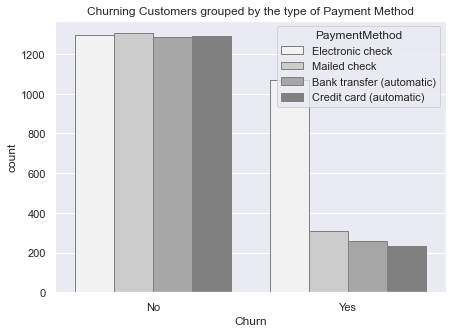

In [39]:
sns.countplot(x = 'Churn', hue = 'PaymentMethod',
              data = df, color = 'gray', 
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by the type of Payment Method')

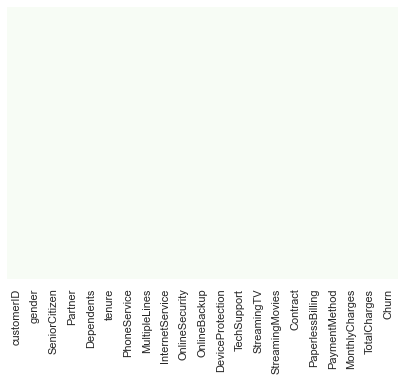

In [40]:
# Checking for Null Values
# In this case, there are no Null Values since we cannot see any lines in the figure below
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Greens")

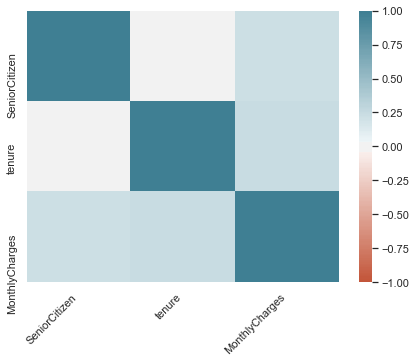

In [41]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Data Analysis

In [42]:
df[['Churn', 'gender', 'customerID']].groupby(['gender', 'Churn']).count()

customerID
gender Churn            
Female No           2549
       Yes           939
Male   No           2625
       Yes           930

In [43]:
df[['Churn', 'SeniorCitizen', 'customerID']].groupby(['SeniorCitizen', 'Churn']).count()

customerID
SeniorCitizen Churn            
0             No           4508
              Yes          1393
1             No            666
              Yes           476

In [44]:
df[['gender','SeniorCitizen','Churn', 'customerID']].groupby(['gender','SeniorCitizen', 'Churn']).count()

customerID
gender SeniorCitizen Churn            
Female 0             No           2221
                     Yes           699
       1             No            328
                     Yes           240
Male   0             No           2287
                     Yes           694
       1             No            338
                     Yes           236

## Data Preprocessing

We are creating a new column that has the value 1 if the customer is a Female. Otherwise, it will have a value of 0 in case if the customer is a Male.

In [45]:
print(df.gender.value_counts())
df['Female'] = df['gender'] == 'Female'
df["Female"] = df["Female"].astype(int)
df.drop('gender', axis = 1, inplace = True)

Male      3555
Female    3488
Name: gender, dtype: int64


In [46]:
print(df.Female.value_counts())

0    3555
1    3488
Name: Female, dtype: int64


We are modifying the Partner column to be 1 if the customer has a partner and 0 otherwise.

In [47]:
print(df.Partner.value_counts())
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

No     3641
Yes    3402
Name: Partner, dtype: int64


In [48]:
print(df.Partner.value_counts())

0    3641
1    3402
Name: Partner, dtype: int64


The Senior Citizen column is already in the desired format, so we do not need to modify it.

In [49]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

We are modifying the Dependents column to be 1 if the customer has Dependents and 0 otherwise.

In [50]:
print(df.Dependents.value_counts())
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

No     4933
Yes    2110
Name: Dependents, dtype: int64


In [51]:
print(df.Dependents.value_counts())

0    4933
1    2110
Name: Dependents, dtype: int64


We are modifying the Phone Service column to be 1 if the customer has Phone Service Available and 0 otherwise.

In [52]:
print(df.PhoneService.value_counts())
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

Yes    6361
No      682
Name: PhoneService, dtype: int64


In [53]:
print(df.PhoneService.value_counts())

1    6361
0     682
Name: PhoneService, dtype: int64


We are modifying the Multiple Lines column to be 1 if the customer has Multiple Lines and 0 otherwise.

In [54]:
print(df.MultipleLines.value_counts())
df['MultipleLines'] = df['MultipleLines'].map({'Yes' : 1, 'No' : 0, 'No phone service' : 0})

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


In [55]:
print(df.MultipleLines.value_counts())

0    4072
1    2971
Name: MultipleLines, dtype: int64


We will One-Hot Encode the Internet Services Column Later.

In [56]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

We are modifying the Online Security column to be 1 if the customer has Oneline Security and 0 otherwise.

In [57]:
print(df.OnlineSecurity.value_counts())
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


In [58]:
print(df.OnlineSecurity.value_counts())

0    5024
1    2019
Name: OnlineSecurity, dtype: int64


We are modifying the Online Backup column to be 1 if the customer has Oneline Backup and 0 otherwise.

In [59]:
print(df.OnlineBackup.value_counts())
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


In [60]:
print(df.OnlineBackup.value_counts())

0    4614
1    2429
Name: OnlineBackup, dtype: int64


We are modifying the Device Protection column to be 1 if the customer has Device Protection and 0 otherwise.

In [61]:
print(df.DeviceProtection.value_counts())
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


In [62]:
print(df.DeviceProtection.value_counts())

0    4621
1    2422
Name: DeviceProtection, dtype: int64


We are modifying the Tech Support column to be 1 if the customer has Tech Support and 0 otherwise.

In [63]:
print(df.TechSupport.value_counts())
df['TechSupport'] = df['TechSupport'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


In [64]:
print(df.TechSupport.value_counts())

0    4999
1    2044
Name: TechSupport, dtype: int64


We are modifying the Streaming TV column to be 1 if the customer has Streaming TV and 0 otherwise.

In [65]:
print(df.StreamingTV.value_counts())
df['StreamingTV'] = df['StreamingTV'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


In [66]:
print(df.StreamingTV.value_counts())

0    4336
1    2707
Name: StreamingTV, dtype: int64


We are modifying the Streaming Movies column to be 1 if the customer has Streaming Movies and 0 otherwise.

In [67]:
print(df.StreamingMovies.value_counts())
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


In [68]:
print(df.StreamingMovies.value_counts())

0    4311
1    2732
Name: StreamingMovies, dtype: int64


We will One-Hot Encode the Contract Column later.

In [69]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

We are modifying the Paperless Billing column to be 1 if the customer has Paperless Billing and 0 otherwise.

In [70]:
print(df.PaperlessBilling.value_counts())
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


In [71]:
print(df.PaperlessBilling.value_counts())

1    4171
0    2872
Name: PaperlessBilling, dtype: int64


We will One-Hot Encode the Payment Method Column later.

In [72]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

We are modifying the Churn column to be 1 if the customer has Churned and 0 otherwise.

In [73]:
print(df.Churn.value_counts())
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

No     5174
Yes    1869
Name: Churn, dtype: int64


In [74]:
print(df.Churn.value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


Taking Care of a few missing values in the Total Charges column. 

In [75]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan).astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [77]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female
0,7590-VHVEG,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,0
2,3668-QPYBK,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


## Training multiple Kaplan Meier Fitter Models

In [78]:
T = df['tenure']
E = df['Churn']

In [79]:
# from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

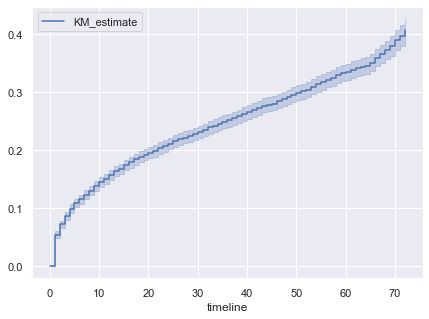

In [80]:
#print(kmf.cumulative_density_)
kmf.plot_cumulative_density()

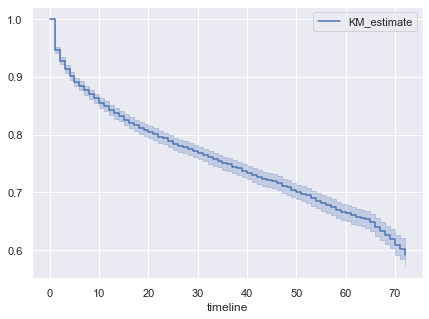

In [81]:
kmf.plot_survival_function() 

In [82]:
median_ = kmf.median_survival_time_
# The estimated median time to event. np.inf if doesn’t exist.
print('Median Value: ' + str(median_))

Median Value: inf


### Survival Analysis of Churning Customer Groups (Senior Citizens Vs. Normal Citizens)

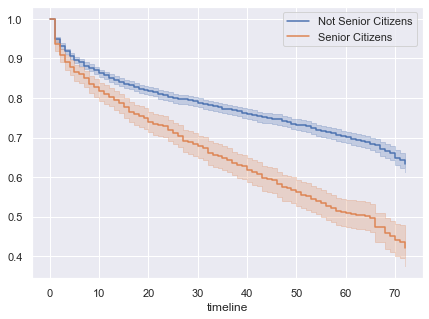

In [83]:
seniorCitizen = (df['SeniorCitizen'] == 1)

kmf.fit(T[~seniorCitizen], E[~seniorCitizen], label = 'Not Senior Citizens')
ax = kmf.plot()

kmf.fit(T[seniorCitizen], E[seniorCitizen], label = 'Senior Citizens')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Partners Vs. Without Partners)

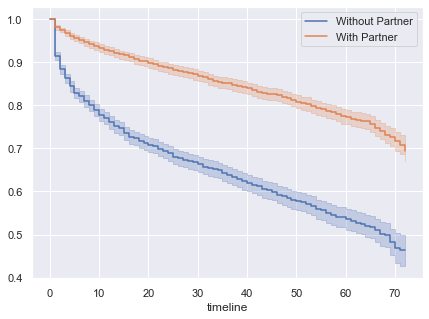

In [84]:
Partner = (df['Partner'] == 1)

kmf.fit(T[~Partner], E[~Partner], label = 'Without Partner')
ax = kmf.plot()

kmf.fit(T[Partner], E[Partner], label = 'With Partner')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Dependents Vs. Without Dependents)

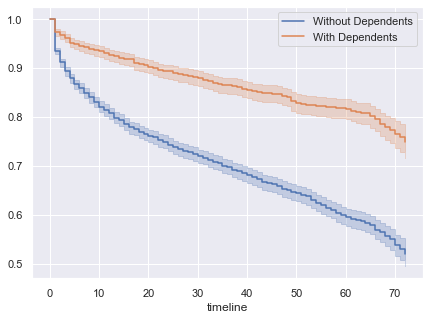

In [85]:
Dependents = (df['Dependents'] == 1)

kmf.fit(T[~Dependents], E[~Dependents], label = 'Without Dependents')
ax = kmf.plot()

kmf.fit(T[Dependents], E[Dependents], label = 'With Dependents')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Phone Service Vs. Without Phone Service)

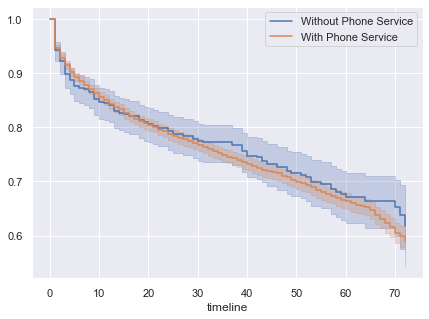

In [86]:
PhoneService = (df['PhoneService'] == 1)

kmf.fit(T[~PhoneService], E[~PhoneService], label = 'Without Phone Service')
ax = kmf.plot()

kmf.fit(T[PhoneService], E[PhoneService], label = 'With Phone Service')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Multiple Lines Vs. Without Multiple Lines)

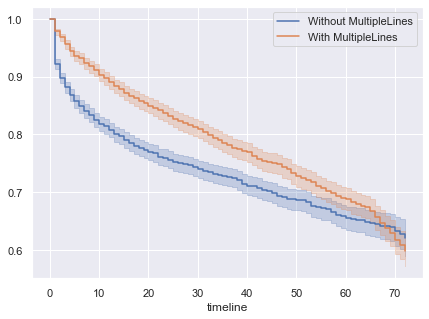

In [87]:
MultipleLines = (df['MultipleLines'] == 1)

kmf.fit(T[~MultipleLines], E[~MultipleLines], label = 'Without MultipleLines')
ax = kmf.plot()

kmf.fit(T[MultipleLines], E[MultipleLines], label = 'With MultipleLines')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With DSL Vs. With Fiber Optics Vs. No Internet Service)

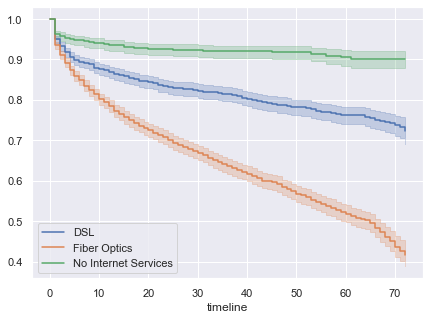

In [88]:
InternetServiceDSL = (df['InternetService'] == 'DSL')
InternetServiceFiberOptic = (df['InternetService'] == 'Fiber optic')
NoInternetService = (df['InternetService'] == 'No')


kmf.fit(T[InternetServiceDSL], E[InternetServiceDSL], label = 'DSL')
ax = kmf.plot()

kmf.fit(T[InternetServiceFiberOptic], E[InternetServiceFiberOptic], label = 'Fiber Optics')
ax = kmf.plot(ax=ax)

kmf.fit(T[NoInternetService], E[NoInternetService], label = 'No Internet Services')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Online Security Vs. Without Online Security)

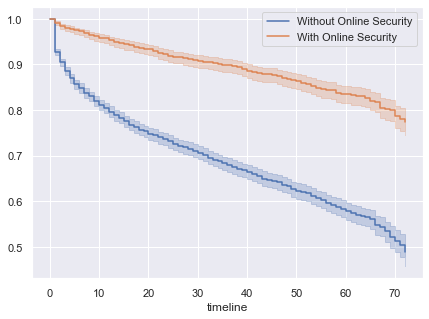

In [89]:
OnlineSecurity = (df['OnlineSecurity'] == 1)

kmf.fit(T[~OnlineSecurity], E[~OnlineSecurity], label = 'Without Online Security')
ax = kmf.plot()

kmf.fit(T[OnlineSecurity], E[OnlineSecurity], label = 'With Online Security')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Online Backup Vs. Without Online Backup)

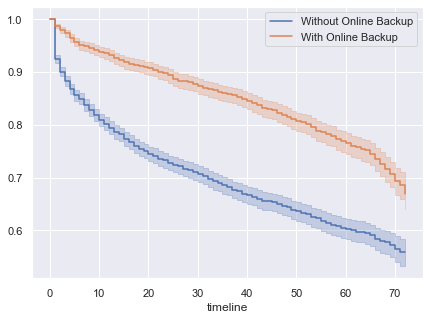

In [90]:
OnlineBackup = (df['OnlineBackup'] == 1)

kmf.fit(T[~OnlineBackup], E[~OnlineBackup], label = 'Without Online Backup')
ax = kmf.plot()

kmf.fit(T[OnlineBackup], E[OnlineBackup], label = 'With Online Backup')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Device Protection Vs. Without Device Protection)

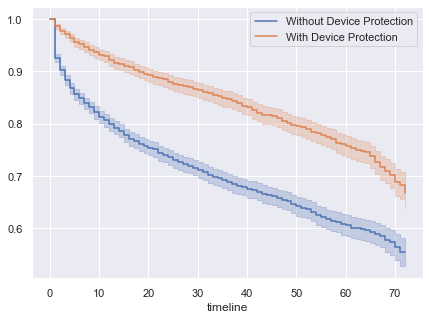

In [91]:
DeviceProtection = (df['DeviceProtection'] == 1)

kmf.fit(T[~DeviceProtection], E[~DeviceProtection], label = 'Without Device Protection')
ax = kmf.plot()

kmf.fit(T[DeviceProtection], E[DeviceProtection], label = 'With Device Protection')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Tech Support Vs. Without Tech Support)

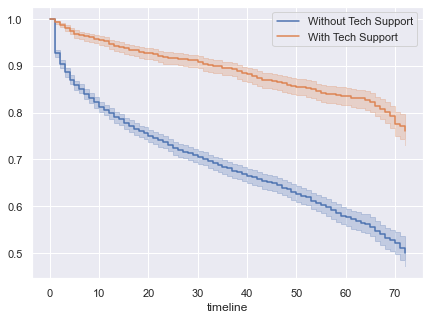

In [92]:
TechSupport = (df['TechSupport'] == 1)

kmf.fit(T[~TechSupport], E[~TechSupport], label = 'Without Tech Support')
ax = kmf.plot()

kmf.fit(T[TechSupport], E[TechSupport], label = 'With Tech Support')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Streaming TV Vs. Without Streaming TV)

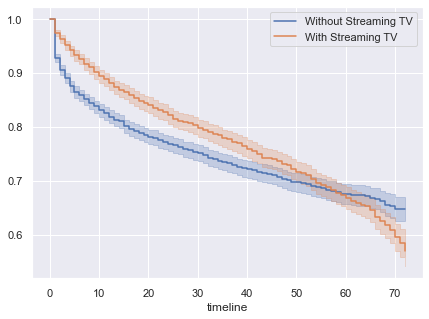

In [93]:
StreamingTV = (df['StreamingTV'] == 1)

kmf.fit(T[~StreamingTV], E[~StreamingTV], label = 'Without Streaming TV')
ax = kmf.plot()

kmf.fit(T[StreamingTV], E[StreamingTV], label = 'With Streaming TV')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Streaming Movies Vs. Without Streaming Movies)

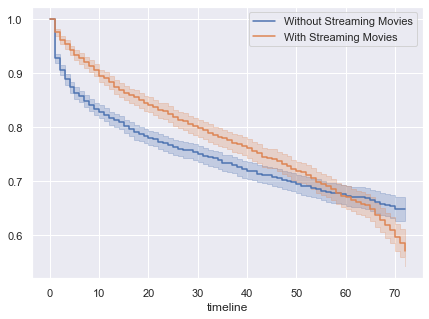

In [94]:
StreamingMovies = (df['StreamingMovies'] == 1)

kmf.fit(T[~StreamingMovies], E[~StreamingMovies], label = 'Without Streaming Movies')
ax = kmf.plot()

kmf.fit(T[StreamingMovies], E[StreamingMovies], label = 'With Streaming Movies')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Paperless Billing Vs. Without Paperless Billing)

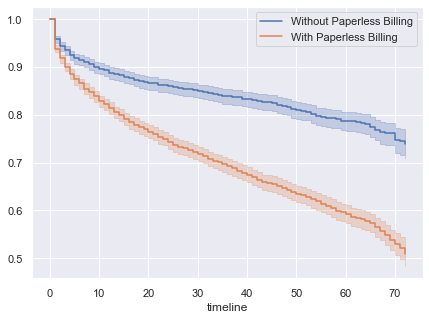

In [95]:
PaperlessBilling = (df['PaperlessBilling'] == 1)

kmf.fit(T[~PaperlessBilling], E[~PaperlessBilling], label = 'Without Paperless Billing')
ax = kmf.plot()

kmf.fit(T[PaperlessBilling], E[PaperlessBilling], label = 'With Paperless Billing')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (With Electronic Check Vs. With Mailed Check Vs. Bank Transfer Vs. Credit Card)

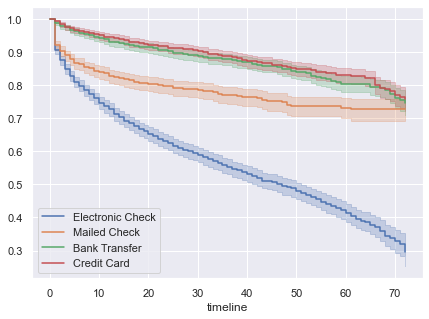

In [96]:
ElectronicCheck = (df['PaymentMethod'] == 'Electronic check')
MailedCheck = (df['PaymentMethod'] == 'Mailed check')
BankTransfer = (df['PaymentMethod'] == 'Bank transfer (automatic)')
CreditCard = (df['PaymentMethod'] == 'Credit card (automatic)')

kmf.fit(T[ElectronicCheck], E[ElectronicCheck], label = 'Electronic Check')
ax = kmf.plot()

kmf.fit(T[MailedCheck], E[MailedCheck], label = 'Mailed Check')
ax = kmf.plot(ax=ax)

kmf.fit(T[BankTransfer], E[BankTransfer], label = 'Bank Transfer')
ax = kmf.plot(ax=ax)

kmf.fit(T[CreditCard], E[CreditCard], label = 'Credit Card')
ax = kmf.plot(ax=ax)

### Survival Analysis of Churning Customer Groups (Male Vs. Female)

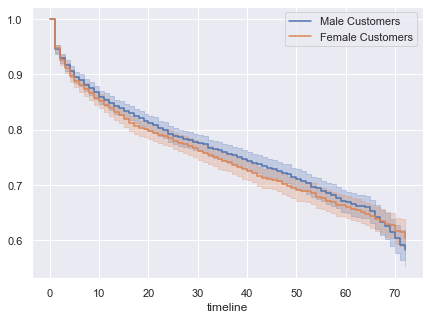

In [97]:
Female = (df['Female'] == 1)

kmf.fit(T[~Female], E[~Female], label = 'Male Customers')
ax = kmf.plot()

kmf.fit(T[Female], E[Female], label = 'Female Customers')
ax = kmf.plot(ax=ax)

In [98]:
from lifelines.utils import median_survival_times

# The estimated median time to event. np.inf if doesn’t exist.
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,Female Customers_lower_0.95,Female Customers_upper_0.95
0.5,inf,inf


## Training a Cox Proportional Hazard Regression Model

In [99]:
cols_of_interest = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                    'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 
                    'MonthlyCharges', 'TotalCharges', 'Female', 'Churn']
data = df[cols_of_interest]
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Female,Churn
0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,1,0
1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,0
2,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,0,1
3,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


In [100]:
data = pd.get_dummies(data)
# Dropping these columns to avoid 'Matrix Singularity Error when training the Model'
data.drop('Contract_Two year', axis = 1, inplace = True)
data.drop('PaymentMethod_Mailed check', axis = 1, inplace = True)
data.drop('InternetService_Fiber optic', axis = 1, inplace = True)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Female,Churn,InternetService_DSL,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,1,0,1,0,0,0,1
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,1,0,0,0
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,0,1,1,0,1,0,0,0,0
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,1,1,0,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,1,0,0,0,1


In [101]:
cph = CoxPHFitter()
cph.fit(data, 'tenure', event_col = 'Churn', show_progress = True)

Iteration 1: norm_delta = 2.42809, step_size = 0.9500, log_lik = -15653.03964, newton_decrement = 2319.28370, seconds_since_start = 0.1
Iteration 2: norm_delta = 1.80141, step_size = 0.9500, log_lik = -13337.92167, newton_decrement = 468.88276, seconds_since_start = 0.1
Iteration 3: norm_delta = 1.13376, step_size = 0.9500, log_lik = -12806.44214, newton_decrement = 115.81352, seconds_since_start = 0.1
Iteration 4: norm_delta = 0.45865, step_size = 1.0000, log_lik = -12671.78404, newton_decrement = 11.16778, seconds_since_start = 0.2
Iteration 5: norm_delta = 0.06386, step_size = 1.0000, log_lik = -12659.85666, newton_decrement = 0.16140, seconds_since_start = 0.2
Iteration 6: norm_delta = 0.00149, step_size = 1.0000, log_lik = -12659.69298, newton_decrement = 0.00008, seconds_since_start = 0.2
Iteration 7: norm_delta = 0.00000, step_size = 1.0000, log_lik = -12659.69290, newton_decrement = 0.00000, seconds_since_start = 0.2
Convergence success after 7 iterations.


<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

In [102]:
cph.print_summary()

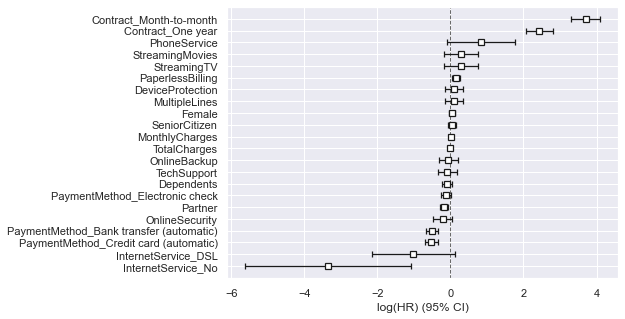

In [103]:
cph.plot() 
# Produces a visual representation of the coefficients (i.e. log hazard ratios), 
# including their standard errors and magnitudes.

In [104]:
cph.params_ # The estimated coefficients.

SeniorCitizen                              0.034453
Partner                                   -0.177998
Dependents                                -0.091525
PhoneService                               0.828169
MultipleLines                              0.086928
OnlineSecurity                            -0.213291
OnlineBackup                              -0.055995
DeviceProtection                           0.087723
TechSupport                               -0.084330
StreamingTV                                0.281107
StreamingMovies                            0.286625
PaperlessBilling                           0.149824
MonthlyCharges                             0.013162
TotalCharges                              -0.001603
Female                                     0.039404
InternetService_DSL                       -1.017472
InternetService_No                        -3.356393
Contract_Month-to-month                    3.701001
Contract_One year                          2.434557
PaymentMetho

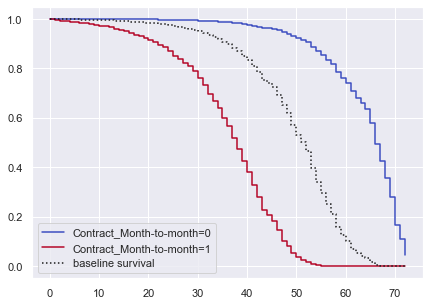

In [105]:
cph.plot_covariate_groups('Contract_Month-to-month', [0, 1], cmap='coolwarm')

# "we can plot what the survival curves look like as we vary a single covariate while holding everything else equal. 
# This is useful to understand the impact of a covariate, given the model. To do this, we use the plot_covariate_groups() 
# method and give it the covariate of interest, and the values to display."

Read More about Predict Expectation Here: https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html?highlight=predict_expectation#lifelines.fitters.coxph_fitter.CoxPHFitter.predict_expectation

In [106]:
cph.predict_expectation(data)

0       20.433055
1       44.854506
2       12.317132
3       56.734992
4        4.594059
          ...    
7038    39.605354
7039    71.825685
7040    26.577785
7041     5.354433
7042    71.966575
Length: 7043, dtype: float64

Read more about Predict Log Partial Hazard Here: https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html?highlight=cph.predict_log_partial_hazard#lifelines.fitters.coxph_fitter.CoxPHFitter.predict_log_partial_hazard

In [107]:
cph.predict_log_partial_hazard(data)

0       3.536192
1       0.516105
2       4.603134
3      -1.021369
4       5.958261
          ...   
7038    1.171406
7039   -6.421250
7040    2.776610
7041    5.785662
7042   -8.079304
Length: 7043, dtype: float64

In [108]:
# The event_observed variable provided
cph.event_observed

488     False
753     False
936     False
1082    False
1340    False
        ...  
3439     True
3890     True
4513     True
4610     True
6424     True
Name: Churn, Length: 7043, dtype: bool

In [109]:
cph.baseline_cumulative_hazard_

,baseline cumulative hazard
0.0,0.000000
1.0,0.000868
2.0,0.001293
3.0,0.001703
4.0,0.002158
5.0,0.002588
6.0,0.002912
7.0,0.003388
8.0,0.003863
9.0,0.004475


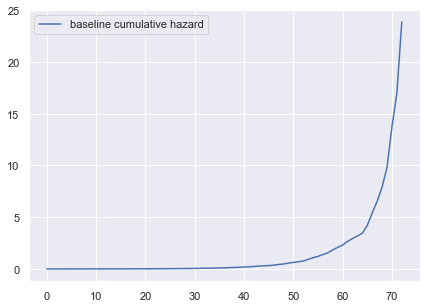

In [110]:
sns.lineplot(data=cph.baseline_cumulative_hazard_)

### Internet Service vs. No Internet Service
- InternetService_No = 1 means no internet service.
- InternetService_No = 0 means internet service is available.

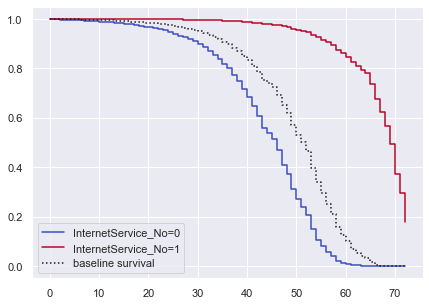

In [111]:
cph.plot_covariate_groups('InternetService_No', [0, 1], cmap='coolwarm')

### Online Security vs. No Online Security

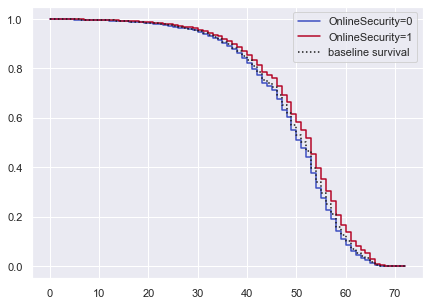

In [112]:
cph.plot_covariate_groups('OnlineSecurity', [0, 1], cmap='coolwarm')

### DSL Internet Service vs. Other Internet Service or No Internet Service

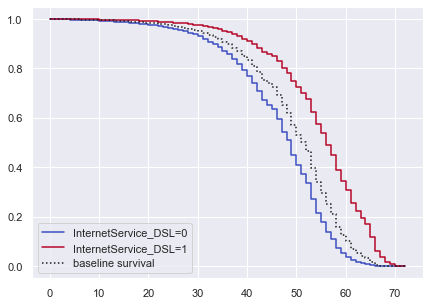

In [113]:
cph.plot_covariate_groups('InternetService_DSL', [0, 1], cmap='coolwarm')

### One Year Contract vs. Two Year and Monthly Contract

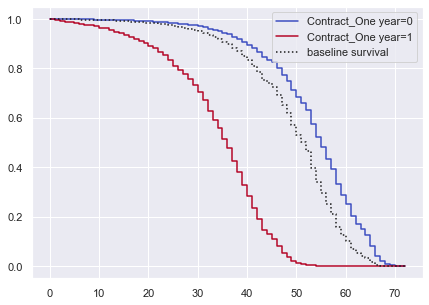

In [114]:
cph.plot_covariate_groups('Contract_One year', [0, 1], cmap='coolwarm')

### Phone Service vs. No Phone Service

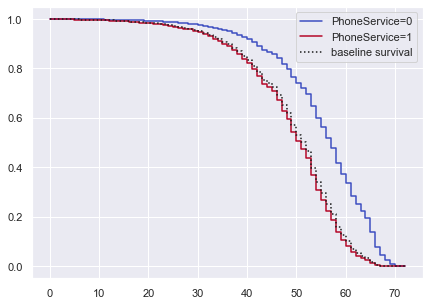

In [115]:
cph.plot_covariate_groups('PhoneService', [0, 1], cmap='coolwarm')

### Senior Citizen vs. Normal Citizen 

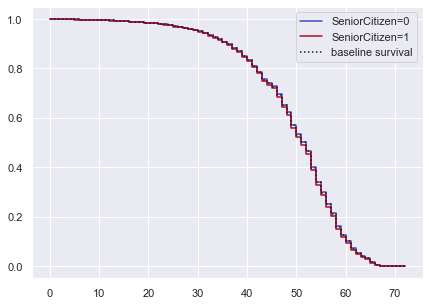

In [116]:
cph.plot_covariate_groups('SeniorCitizen', [0, 1], cmap='coolwarm')

### Dependents vs. No Dependents

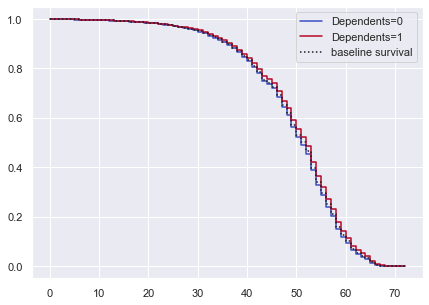

In [117]:
cph.plot_covariate_groups('Dependents', [0, 1], cmap='coolwarm')

### Senior Citizen and Partner

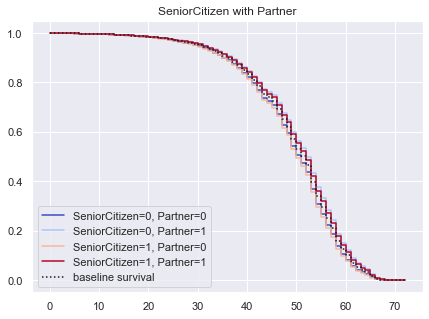

In [118]:
cph.plot_covariate_groups(['SeniorCitizen', 'Partner'], 
                            [
                                [0, 0],
                                [0, 1],
                                [1, 0],
                                [1, 1],
                            ],
                            cmap='coolwarm')
#plt.savefig('SeniorCitizen with Partner.png')
plt.title("SeniorCitizen with Partner");

### Senior Citizen and Dependents

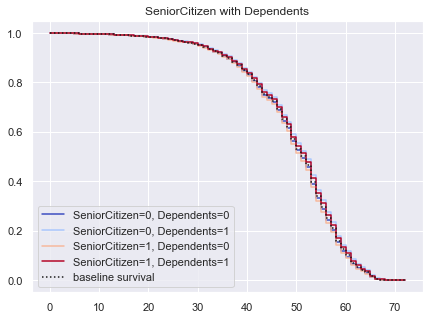

In [119]:
cph.plot_covariate_groups(['SeniorCitizen', 'Dependents'], 
                            [
                                [0, 0],
                                [0, 1],
                                [1, 0],
                                [1, 1],
                            ],
                            cmap='coolwarm')
#plt.savefig('Media/SeniorCitizen with Dependents.png')
plt.title("SeniorCitizen with Dependents");

### Phone Service and Internet Service
- InternetService_No = 1 means no internet service.
- InternetService_No = 0 means internet service is available.

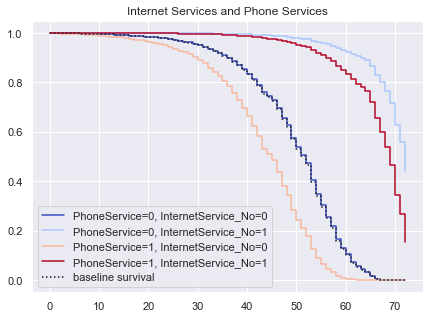

In [120]:
cph.plot_covariate_groups(
    ['PhoneService', 'InternetService_No'],
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ],
    cmap='coolwarm')
#plt.savefig('Media/Internet Services and Phone Services.png')
plt.title("Internet Services and Phone Services");

### Predicting Survival of all the Customers

In [121]:
data['ID'] = df['customerID']
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Female,Churn,InternetService_DSL,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,ID
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,1,0,1,0,0,0,1,7590-VHVEG
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,0,0,1,0,0,0,5575-GNVDE
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,0,1,1,0,1,0,0,0,0,3668-QPYBK
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,1,1,0,0,7795-CFOCW
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,1,0,0,0,1,9237-HQITU


In [122]:
cph.predict_survival_function(data.drop('ID', axis = 1))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846,6847,6848,6849,6850,6851,6852,6853,6854,6855,6856,6857,6858,6859,6860,6861,6862,6863,6864,6865,6866,6867,6868,6869,6870,6871,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,6912,6913,6914,6915,6916,6917,6918,6919,6920,6921,6922,6923,6924,6925,6926,6927,6928,6929,6930,6931,6932,6933,6934,6935,6936,6937,6938,6939,6940,6941,6942,6943,6944,6945,6946,6947,6948,6949,6950,6951,6952,6953,6954,6955,6956,6957,6958,6959,6960,6961,6962,6963,6964,6965,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,6976,6977,6978,6979,6980,6981,6982,6983,6984,6985,6986,6987,6988,6989,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000,7001,7002,7003,7004,7005,7006,7007,7008,7009,7010,7011,7012,7013,7014,7015,7016,7017,7018,7019,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029,7030,7031,7032,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.00

In [123]:
cph.predict_median(data.drop('ID', axis = 1))

0       22.0
1       47.0
2       13.0
3       59.0
4        4.0
        ... 
7038    42.0
7039     inf
7040    29.0
7041     4.0
7042     inf
Name: 0.5, Length: 7043, dtype: float64

Read more about Predict Partial Hazard Here: https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html#lifelines.fitters.coxph_fitter.CoxPHFitter.predict_partial_hazard

In [124]:
cph.predict_partial_hazard(data.drop('ID', axis = 1))

0        34.335924
1         1.675489
2        99.796570
3         0.360102
4       386.936731
           ...    
7038      3.226526
7039      0.001627
7040     16.064474
7041    325.597454
7042      0.000310
Length: 7043, dtype: float64

Read more about Predict Median Here: https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html#lifelines.fitters.coxph_fitter.CoxPHFitter.predict_median

In [125]:
cph.predict_median(data)

0       22.0
1       47.0
2       13.0
3       59.0
4        4.0
        ... 
7038    42.0
7039     inf
7040    29.0
7041     4.0
7042     inf
Name: 0.5, Length: 7043, dtype: float64

### Predicting Survival of a specific Customer

In [126]:
input_ = data.loc[data['ID'] == '3668-QPYBK']
input_.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Female,Churn,InternetService_DSL,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,ID
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,0,1,1,0,1,0,0,0,0,3668-QPYBK


Text(0.5, 1.0, 'Survival of the Customer - 3668-QPYBK')

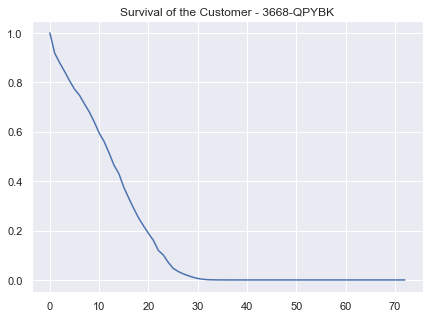

In [127]:
results = cph.predict_survival_function(input_.drop('ID', axis = 1))
sns.lineplot(data = results, 
             legend = False).set_title('Survival of the Customer - 3668-QPYBK')

Read more about Predict Partial Hazard Here: https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html#lifelines.fitters.coxph_fitter.CoxPHFitter.predict_partial_hazard

In [128]:
cph.predict_partial_hazard(input_.drop('ID', axis = 1))

2    99.79657
dtype: float64

### Using Cross-Validation Scheme
- This allows us to be Confident that the predictions will work well in practice.
- This also allows us to choose between multiple models.
- An example is as follows
- Read More Here: https://lifelines.readthedocs.io/en/latest/lifelines.utils.html?highlight=k_fold_cross_validation#lifelines.utils.k_fold_cross_validation

In [129]:
from lifelines.utils import k_fold_cross_validation

cph = CoxPHFitter()

print(np.mean(k_fold_cross_validation(cph, data.drop('ID', axis = 1), duration_col='tenure', event_col='Churn')))

-1.3751840025173716
